In [1]:
# importing modules required

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as sc
import sklearn as sk
import statsmodels as st
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import warnings
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMAResults
from matplotlib import pyplot, legend, figure
from pandas import DataFrame
from scipy.stats import boxcox
from array import *

warnings.filterwarnings("ignore")

In [2]:
# read excel that is filtered to top 5 countries (GDP)
df = pd.read_csv('germany_gdp.csv')

In [3]:
# get top 5 rows "df"
df.head()

Country  Year  GDP Value                                        Type of GDP
0  Germany  1990  20249.138  GDP per capita, current prices (U.S. dollars p...
1  Germany  1991  23453.063  GDP per capita, current prices (U.S. dollars p...
2  Germany  1992  26538.043  GDP per capita, current prices (U.S. dollars p...
3  Germany  1993  25602.961  GDP per capita, current prices (U.S. dollars p...
4  Germany  1994  27233.633  GDP per capita, current prices (U.S. dollars p...

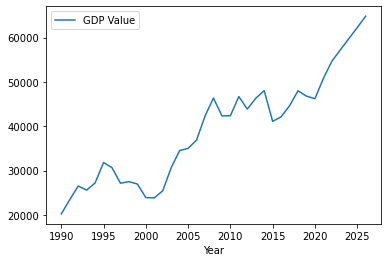

In [4]:
# plot time series of Year vs GDP
top10_gdp_countries = df.groupby(['Year']).sum().plot()

In [5]:
# get top 5 rows of "top5_gdp_countries" after it have been summed, groupby year
top10_gdp_countries = df.groupby(['Year']).sum()
top10_gdp_countries.head()

GDP Value
Year           
1990  20249.138
1991  23453.063
1992  26538.043
1993  25602.961
1994  27233.633

In [6]:
# reset first column to be index from 0 onwards instead of year
reset_index = df.groupby(['Year']).sum().reset_index()
# show columns of reset_index
reset_index.columns

Index(['Year', 'GDP Value'], dtype='object')

In [7]:
# drop null values if there are

top10_gdp_countries.dropna(inplace=True)

# assigning training and testing dataset based on 50% split
x = top10_gdp_countries.values
train_size = int(len(top10_gdp_countries) * 0.80)
train, test = x[0:train_size], x[train_size:]

In [8]:
# ARIMA model 

# Dataset > period 1990 - 2003
# Validation set > period 2004 - 2018 

# assigning training and testing dataset based on 80% split
train_size = int(len(top10_gdp_countries) * 0.80)
split_point = len(top10_gdp_countries) - 15
dataset, validation = top10_gdp_countries[0:split_point], top10_gdp_countries[split_point:]

# number of years used in each set
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

# save each set into a csv file
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 22, Validation 15


In [9]:
# function arima

def evaluate_arima_model(X, arima_order):

    X = top5_ghg_countries.astype('float32')
    
    # assigning training and testing dataset based on 80% split
    train_size = int(len(X) * 0.80)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    # for every record from historical years, append into a list to be used for prediction
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        
        # expected trend to be non constant, hence trend = nc
        model_fit = model.fit(trend='nc', disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

    # To calculate RMSE to see how well the model fits
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    return rmse

In [10]:
# search for optimal ARIMA parameters automatically
# if automatic method does not work, proceed to use manual method below

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s RMSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA = %s \nRMSE = %.3f' % (best_cfg, best_score))
    
p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(top10_gdp_countries.values, p_values, d_values, q_values)

Best ARIMA = None 
RMSE = inf


In [11]:
# Identify best ARIMA model manually

# check if stationary
result = adfuller(top10_gdp_countries)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    

ADF Statistic: 0.016800
p-value: 0.959900
Critical Values:
	1%: -3.627
	5%: -2.946
	10%: -2.612


In [12]:
# By looking at the p-value of this test, we cannot reject the null hypothesis, 
# and it is likely that our dataset is non-stationary. We therefore choose the first parameter in 
# our ARIMA model (the p) as a 1. We do not choose a higher number because although our 
# dataset is non-stationary, it is not likely that seasonality is present because we work with annual data.

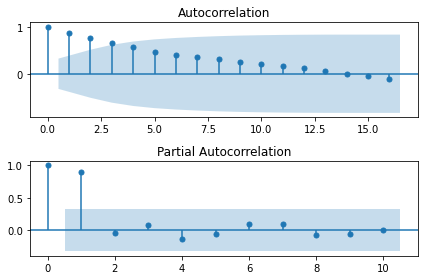

In [13]:
# Creates ACF and PACF plots
pyplot.figure()
pyplot.subplot(211)
plot_acf(top10_gdp_countries, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(top10_gdp_countries, ax=pyplot.gca(), lags = 10)
pyplot.tight_layout()
pyplot.show()

In [14]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    
    # prediction
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    
    #observation
    obs = test[i]
    history.append(obs)

# summarize residual errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())

                 0
count     8.000000
mean   1745.254178
std    1987.122705
min   -1646.478790
25%    1347.217778
50%    2019.495170
75%    2385.233191
max    4640.521426


In [15]:
# saving the ARIMA model

def __getnewargs__(self):
	return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
 
ARIMA.__getnewargs__ = __getnewargs__

model = ARIMA(x, order=(1,0,0))
model_fit = model.fit(trend='nc', disp=0)

# bias would be the "mean" that was shown in previous cell
bias = 1745.254178

model_fit.save('model.pkl')
np.save('model_bias.npy', [bias])

In [16]:
# load model and predict one period in the future

model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
yhat = bias + float(model_fit.forecast()[0])
print('Predicted: %.3f' % yhat)

Predicted: 66409.252


In [17]:
# validate using dataset and validation set

# function for difference of dataset
def difference(dataset):
        diff = list()
        for i in range(1, len(dataset)):
                value = dataset[i] - dataset[i - 1]
                diff.append(value)
        return diff

X = top10_gdp_countries.values
X = X.astype('float32')    

# difference data
stationary = difference(X)

# data frame of difference data
df_X = pd.DataFrame({'Year': top10_gdp_countries.index.values, 'X':X.flatten()})

In [18]:
# validation set

validation = pd.read_csv('validation.csv')

def difference(validation):
        diff = list()
        for i in range(1, len(validation)):
                value = validation[i] - validation[i - 1]
                diff.append(value)
        return diff

y = np.array(validation['GDP Value'])
y = y.astype('float32')
      
stationary = difference(y)

df_y = pd.DataFrame({'Year': validation.index.values,'y':y.flatten()})


In [19]:
history = [x for x in X]

model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')

>Predicted = 66409.252, Expected = 43883
>Predicted = 45270.936, Expected = 46299
>Predicted = 47696.225, Expected = 48036
>Predicted = 49443.134, Expected = 41107
>Predicted = 42501.604, Expected = 42124
>Predicted = 43526.491, Expected = 44637
>Predicted = 46044.887, Expected = 47995
>Predicted = 49410.381, Expected = 46800
>Predicted = 48221.573, Expected = 46216
>Predicted = 47644.080, Expected = 50788
>Predicted = 52221.702, Expected = 54653
>Predicted = 56096.043, Expected = 57209
>Predicted = 58662.302, Expected = 59728
>Predicted = 61473.457, Expected = 62236
>Predicted = 63709.866, Expected = 64801
RMSE: 6398.08
MAE: 3326.05


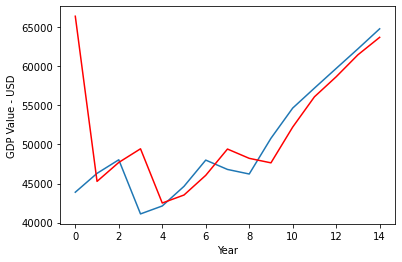

In [20]:
predictions = list()
yhat = bias + float(model_fit.forecast()[0])
predictions.append(yhat)
history.append(y[0])
print('>Predicted = %.3f, Expected = %3.f' % (yhat, y[0]))


for i in range(1, len(y)):
    model = ARIMA(history, order=(1,0,0))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = bias + float(model_fit.forecast()[0])
    predictions.append(yhat)

    obs=y[i]
    history.append(obs)
#     year += 1
    print('>Predicted = %.3f, Expected = %3.f' % (yhat, obs))
    
# mean squared error
mse = mean_squared_error(y, predictions)
# root mean squared error
rmse = sqrt(mse)
print('RMSE: %.2f' % rmse)
# mean absolute error
mae = mean_absolute_error(y, predictions)
print('MAE: %.2f' % mae)

# plot graph based on predictions (red) vs actuals (blue) from year 1990 to 2004
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.xlabel('Year')
pyplot.ylabel('GDP Value - USD')
pyplot.show()

In [21]:
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
forecast = model_fit.forecast(steps=12)[0]
print (forecast)

[64663.99749772 64527.41409776 64391.11918947 64255.11216351
 64119.39241182 63983.9593276  63848.81230536 63713.95074088
 63579.37403121 63445.08157468 63311.0727709  63177.34702074]


In [22]:
arr = (np.array([np.nan]))

In [23]:
# arr

In [24]:
for i in range(36):
    predictions.insert(0,arr)

In [25]:
# to identify prediction in 2030
year_2030 = predictions[40][0]
round(year_2030,2)

42501.6

Text(0, 0.5, 'GDP Value - Metric Ton')

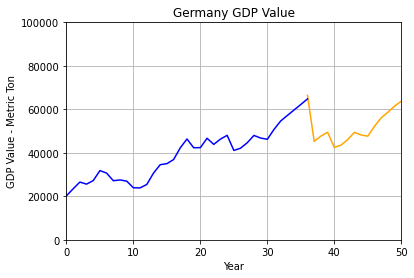

In [26]:
# prediction of GDP up to year 50. Year 0 is 1990, year 50 is 2040

plt.grid()
plt.plot(predictions, color = 'orange' )
plt.plot(x, color = 'b')
plt.xlim ((0,50))
plt.ylim ((0,100000))
plt.title('Germany GDP Value')
plt.xlabel('Year')
plt.ylabel('GDP Value - Metric Ton')

In [27]:
# for comparing purposes
for i in predictions:
    print (i[0])

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
66409.25167571801
45270.93633664198
47696.22522976549
49443.13379964099
42501.60410737765
43526.491462494516
46044.88723947949
49410.3805835649
48221.573182769185
47644.07993094026
52221.70164383649
56096.04290069547
58662.30215001516
61473.45728163141
63709.86586159024
